# Homework 5
DASC 512  
Richy Peterson

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from matplotlib.ticker import FormatStrFormatter
sns.set_style('darkgrid')

***
## Problem 1

In [2]:
hof = pd.read_csv('hofbatting.csv')
hof.head()

,Rk,Unnamed: 1,Inducted,Yrs,From,To,ASG,WAR/pos,G,PA,...,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS
0,1,Hank Aaron HOF,1982,23,1954,1976,25,137.3,3298,13941,...,755,2297,240,73.0,1402,1383,0.305,0.374,0.555,0.928
1,3,Roberto Alomar HOF,2011,17,1988,2004,12,62.9,2379,10400,...,210,1134,474,114.0,1032,1140,0.300,0.371,0.443,0.814
2,6,Cap Anson HOF,1939,27,1871,1897,0,91.1,2524,11331,...,97,2075,277,16.0,984,330,0.334,0.394,0.447,0.841
3,7,Luis Aparicio HOF,1984,18,1956,1973,13,51.7,2599,11230,...,83,791,506,136.0,736,742,0.262,0.311,0.343,0.653
4,8,Luke Appling HOF,1964,20,1930,1950,7,69.9,2422,10254,...,45,1116,179,108.0,1302,528,0.310,0.399,0.398,0.798


In [3]:
# (a)
x = hof['OBP']
y = hof['SLG']

In [4]:
model = smf.ols(formula='Q("SLG") ~ Q("OBP")',data=hof).fit()
beta0, beta1 = model.params

In [5]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.374    
Dependent Variable: Q("SLG")         AIC:                -444.9484
Date:               2023-08-09 19:15 BIC:                -438.9675
No. Observations:   147              Log-Likelihood:     224.47   
Df Model:           1                F-statistic:        88.34    
Df Residuals:       145              Prob (F-statistic): 1.11e-16 
R-squared:          0.379            Scale:              0.0027997
--------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept     0.0175     0.0473   0.3698   0.7120   -0.0760   0.1110
Q("OBP")      1.1823     0.1258   9.3989   0.0000    0.9337   1.4310
------------------------------------------------------------------
Omnibus:              7.310         Durbin-Watson:           2.220
Prob(Omnibus):        0.026         Jarque-Bera (JB):        3.644
Skew:                 -0.123        Prob(JB):                0.162
Kurtosis:             2.269         Condition No.:           33   
==================================================================

"""

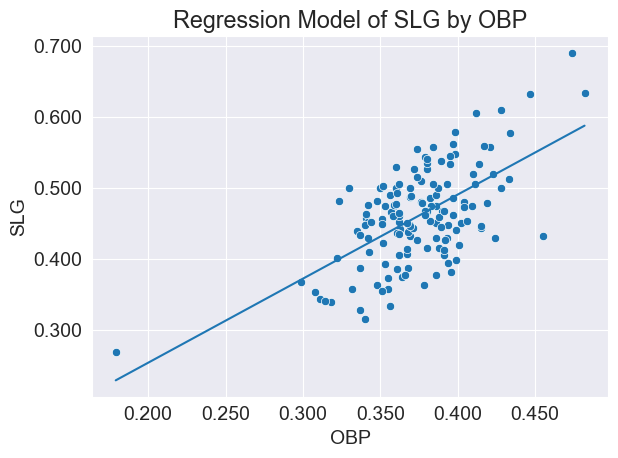

In [6]:
xrng = np.linspace(x.min(),x.max(),100)
yhat = [(beta0 + beta1 * xx) for xx in xrng]


plt.rc('font',size=14)
fig, ax = plt.subplots()
sns.scatterplot(x=x, y=y, ax=ax)
sns.lineplot(x=xrng, y=yhat, ax=ax)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

ax.set_title('Regression Model of SLG by OBP')

fig.tight_layout()
fig.savefig('1a_scatter_obp_slg.png')

In [7]:
# b and c
dfpred = pd.DataFrame({'OBP':[0.320]})
prediction = model.get_prediction(dfpred)
dfpred = dfpred.join(prediction.summary_frame(alpha=0.05))
dfpred

,OBP,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.32,0.395848,0.008129,0.379782,0.411915,0.290043,0.501654


In [8]:
# d
hof2 = hof[hof['OBP']>.200].copy()
x = hof2['OBP']
y = hof2['SLG']
model = smf.ols(formula='Q("SLG") ~ Q("OBP")',data=hof2).fit()
beta0, beta1 = model.params
model.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.340    
Dependent Variable: Q("SLG")         AIC:                -441.6349
Date:               2023-08-09 19:15 BIC:                -435.6677
No. Observations:   146              Log-Likelihood:     222.82   
Df Model:           1                F-statistic:        75.77    
Df Residuals:       144              Prob (F-statistic): 6.74e-15 
R-squared:          0.345            Scale:              0.0028049
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept   -0.0041     0.0537   -0.0760   0.9395   -0.1102   0.1020
Q("OBP")     1.2390     0.1423    8.7044   0.0000    0.9577   1.5204
------------------------------------------------------------------
Omnibus:              7.353         Durbin-Watson:           2.221
Prob(Omnibus):        0.025         Jarque-Bera (JB):        3.696
Skew:                 -0.134        Prob(JB):                0.158
Kurtosis:             2.268         Condition No.:           37   
==================================================================

"""

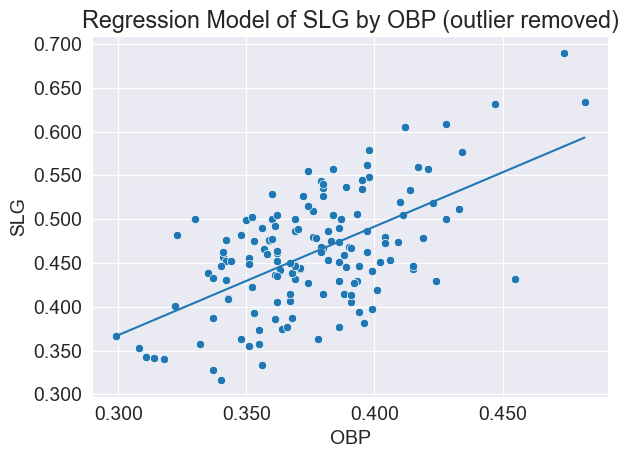

In [9]:
xrng = np.linspace(x.min(),x.max(),100)
yhat = [(beta0 + beta1 * xx) for xx in xrng]


plt.rc('font',size=14)
fig, ax = plt.subplots()
sns.scatterplot(x=x, y=y, ax=ax)
sns.lineplot(x=xrng, y=yhat, ax=ax)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

ax.set_title('Regression Model of SLG by OBP (outlier removed)')

fig.tight_layout()
fig.savefig('1d_scatter_obp_slg.png')

In [10]:
dfpred = pd.DataFrame({'OBP':[0.320]})
prediction = model.get_prediction(dfpred)
dfpred = dfpred.join(prediction.summary_frame(alpha=0.05))
dfpred

,OBP,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.32,0.392409,0.009079,0.374464,0.410354,0.2862,0.498619


***
## Problem 2

In [11]:
# a
df = pd.read_csv('Teamdata.csv')
df.head()

,Unnamed: 0,teamID,yearID,lgID,G,W,L,R,RA
0,1,ANA,2001,AL,162,75,87,691,730
1,2,ARI,2001,NL,162,92,70,818,677
2,3,ATL,2001,NL,162,88,74,729,643
3,4,BAL,2001,AL,162,63,98,687,829
4,5,BOS,2001,AL,161,82,79,772,745


In [12]:
df['Run Differential'] = df['R'] - df['RA']
df['Win Percentage'] = df['W'] / (df['W'] + df['L'])
df.head()

,Unnamed: 0,teamID,yearID,lgID,G,W,L,R,RA,Run Differential,Win Percentage
0,1,ANA,2001,AL,162,75,87,691,730,-39,0.462963
1,2,ARI,2001,NL,162,92,70,818,677,141,0.567901
2,3,ATL,2001,NL,162,88,74,729,643,86,0.543210
3,4,BAL,2001,AL,162,63,98,687,829,-142,0.391304
4,5,BOS,2001,AL,161,82,79,772,745,27,0.509317


In [13]:
x = df['Run Differential']
y = df['Win Percentage']
formula = 'Q("Win Percentage") ~ Q("Run Differential")'
model = smf.ols(formula=formula, data=df).fit()
beta0, beta1 = model.params
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:              OLS                 Adj. R-squared:     0.875     
Dependent Variable: Q("Win Percentage") AIC:                -2434.1004
Date:               2023-08-09 19:15    BIC:                -2425.5173
No. Observations:   540                 Log-Likelihood:     1219.1    
Df Model:           1                   F-statistic:        3783.     
Df Residuals:       538                 Prob (F-statistic): 1.53e-245 
R-squared:          0.875               Scale:              0.00064313
----------------------------------------------------------------------
                         Coef.  Std.Err.    t     P>|t|  [0.025 0.975]
----------------------------------------------------------------------
Intercept                0.5000   0.0011 458.1524 0.0000 0.4978 0.5021
Q("Run Differential")    0.0006   0.0000  61.5023 0.0000 0.0006 0.0006
----------------------------------------------------------------------
Omnibus:                 5.284         Durbin-Watson:            2.155
Prob(Omnibus):           0.071         Jarque-Bera (JB):         5.090
Skew:                    0.226         Prob(JB):                 0.078
Kurtosis:                3.149         Condition No.:            109  
======================================================================

"""

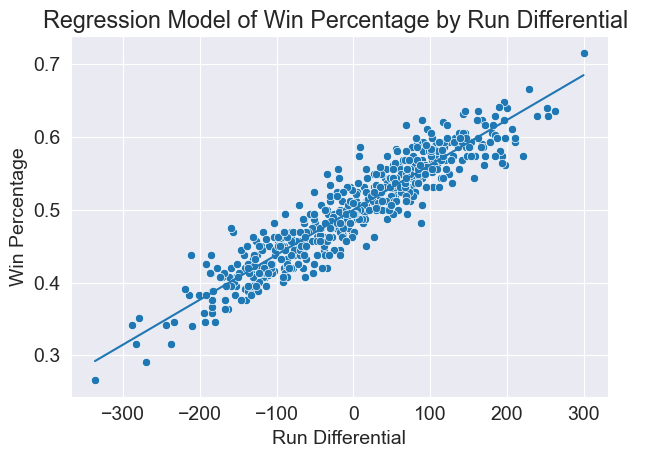

In [14]:
xrng = np.linspace(x.min(),x.max(),100)
yhat = [(beta0 + beta1 * xx) for xx in xrng]


plt.rc('font',size=14)
fig, ax = plt.subplots()
sns.scatterplot(x=x, y=y, ax=ax)
sns.lineplot(x=xrng, y=yhat, ax=ax)

ax.set_title('Regression Model of Win Percentage by Run Differential ')

fig.tight_layout()
fig.savefig('2a_scatter_win_rundiff.png')

In [15]:
# b
dfpred = pd.DataFrame({'Run Differential': xrng})
prediction = model.get_prediction(dfpred)
dfpred = dfpred.join(prediction.summary_frame(alpha=0.05))
ei_lower = dfpred['mean_ci_lower']
ei_upper = dfpred['mean_ci_upper']
pi_lower = dfpred['obs_ci_lower']
pi_upper = dfpred['obs_ci_upper']

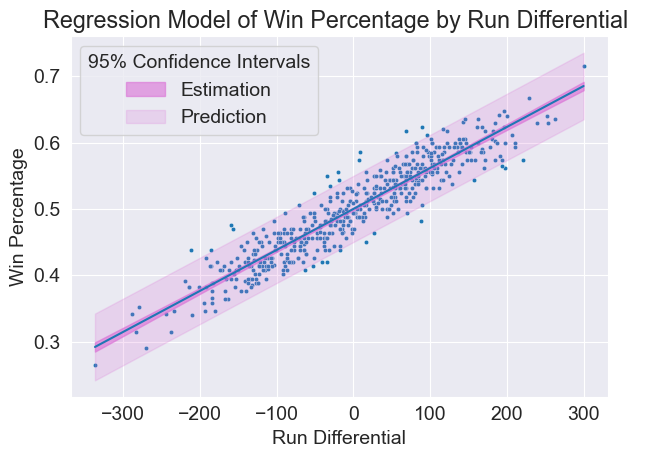

In [16]:
fig, ax = plt.subplots()
sns.scatterplot(x=x, y=y, ax=ax, s=10)
sns.lineplot(x=xrng, y=yhat, ax=ax)

ax.fill_between(xrng, ei_lower, ei_upper, color='orchid', alpha=0.6, label='Estimation')
ax.fill_between(xrng, pi_lower, pi_upper, color='orchid', alpha=0.2, label='Prediction')

ax.set_title('Regression Model of Win Percentage by Run Differential ')
ax.legend(title='95% Confidence Intervals')

fig.tight_layout()
fig.savefig('2b_scatter_win_rundiff_with_intervals.png')

In [17]:
# c
df['Pythagorean Expectation'] = df['R']**2 / (df['R']**2 + df['RA']**2)
x_pe = df['Pythagorean Expectation']
y = df['Win Percentage']
formula = 'Q("Win Percentage") ~ Q("Pythagorean Expectation")'
model_pe = smf.ols(formula=formula, data=df).fit()
beta0, beta1 = model_pe.params
model_pe.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:               OLS                  Adj. R-squared:      0.874     
Dependent Variable:  Q("Win Percentage")  AIC:                 -2428.3683
Date:                2023-08-09 19:15     BIC:                 -2419.7852
No. Observations:    540                  Log-Likelihood:      1216.2    
Df Model:            1                    F-statistic:         3737.     
Df Residuals:        538                  Prob (F-statistic):  2.67e-244 
R-squared:           0.874                Scale:               0.00064999
-------------------------------------------------------------------------
                             Coef.  Std.Err.    t    P>|t|  [0.025 0.975]
-------------------------------------------------------------------------
Intercept                    0.0394   0.0076  5.1778 0.0000 0.0245 0.0544
Q("Pythagorean Expectation") 0.9201   0.0151 61.1303 0.0000 0.8906 0.9497
-------------------------------------------------------------------------
Omnibus:                  5.966          Durbin-Watson:             2.125
Prob(Omnibus):            0.051          Jarque-Bera (JB):          5.797
Skew:                     0.245          Prob(JB):                  0.055
Kurtosis:                 3.132          Condition No.:             17   
=========================================================================

"""

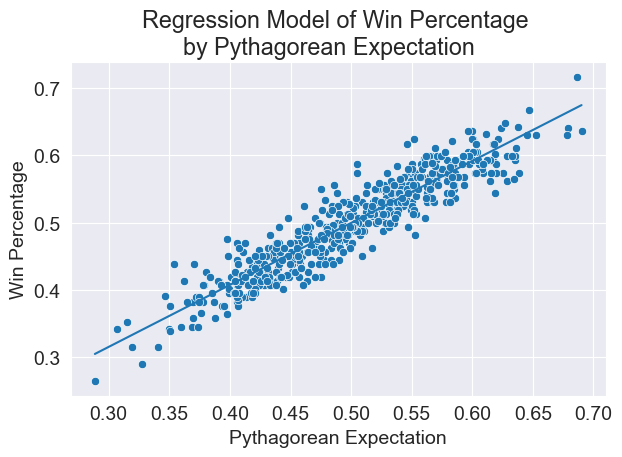

In [18]:
xrng = np.linspace(x_pe.min(),x_pe.max(),100)
yhat = [(beta0 + beta1 * xx) for xx in xrng]



fig, ax = plt.subplots()
sns.scatterplot(x=x_pe, y=y, ax=ax)
sns.lineplot(x=xrng, y=yhat, ax=ax)

ax.set_title('Regression Model of Win Percentage \nby Pythagorean Expectation   ')

fig.tight_layout()
fig.savefig('2c_scatter_win_pythagexpt.png')

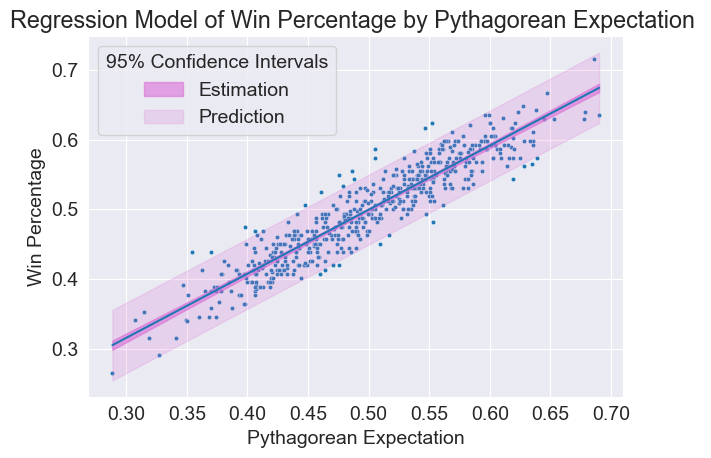

In [19]:
dfpred = pd.DataFrame({'Pythagorean Expectation': xrng})
prediction = model_pe.get_prediction(dfpred)
dfpred = dfpred.join(prediction.summary_frame(alpha=0.05))
ei_lower = dfpred['mean_ci_lower']
ei_upper = dfpred['mean_ci_upper']
pi_lower = dfpred['obs_ci_lower']
pi_upper = dfpred['obs_ci_upper']

fig, ax = plt.subplots()
sns.scatterplot(x=x_pe, y=y, ax=ax, s=10)
sns.lineplot(x=xrng, y=yhat, ax=ax)

ax.fill_between(xrng, ei_lower, ei_upper, color='orchid', alpha=0.6, label='Estimation')
ax.fill_between(xrng, pi_lower, pi_upper, color='orchid', alpha=0.2, label='Prediction')

ax.set_title('Regression Model of Win Percentage by Pythagorean Expectation ')
ax.legend(title='95% Confidence Intervals')

fig.tight_layout()

In [20]:
# d

df[(df['teamID']=='SEA') & (df['yearID']==2001)]

,Unnamed: 0,teamID,yearID,lgID,G,W,L,R,RA,Run Differential,Win Percentage,Pythagorean Expectation
24,25,SEA,2001,AL,162,116,46,927,627,300,0.716049,0.686114


In [21]:
df.describe()

,Unnamed: 0,yearID,G,W,L,R,RA,Run Differential,Win Percentage,Pythagorean Expectation
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,270.500000,2009.500000,161.962963,80.972222,80.972222,733.264815,733.264815,0.000000,0.499990,0.500545
std,156.028843,5.192938,0.308384,11.636946,11.615244,79.402256,85.991490,108.823221,0.071800,0.072957
min,1.000000,2001.000000,161.000000,43.000000,46.000000,513.000000,525.000000,-337.000000,0.265432,0.288551
25%,135.750000,2005.000000,162.000000,72.000000,72.000000,676.750000,673.750000,-82.500000,0.444444,0.442417
50%,270.500000,2009.500000,162.000000,81.000000,81.000000,730.000000,727.500000,2.500000,0.500000,0.501719
75%,405.250000,2014.000000,162.000000,90.000000,90.000000,785.000000,792.500000,80.250000,0.555556,0.553235
max,540.000000,2018.000000,163.000000,116.000000,119.000000,968.000000,971.000000,300.000000,0.716049,0.690171


In [22]:
dfpred_rd = pd.DataFrame({'Run Differential':[300]})
dfpred_pe = pd.DataFrame({'Pythagorean Expectation': [0.686114]})

prediction_rd = model.get_prediction(dfpred_rd)
dfpred_rd = dfpred_rd.join(prediction_rd.summary_frame(alpha=0.05))
dfpred_rd

,Run Differential,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,300,0.685192,0.003203,0.6789,0.691484,0.63498,0.735405


In [23]:
prediction_pe = model_pe.get_prediction(dfpred_pe)
dfpred_pe = dfpred_pe.join(prediction_pe.summary_frame(alpha=0.05))
dfpred_pe

,Pythagorean Expectation,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.686114,0.670739,0.003001,0.664844,0.676634,0.620312,0.721167


In [24]:
resid_rd = model.resid
resid_pe = model_pe.resid

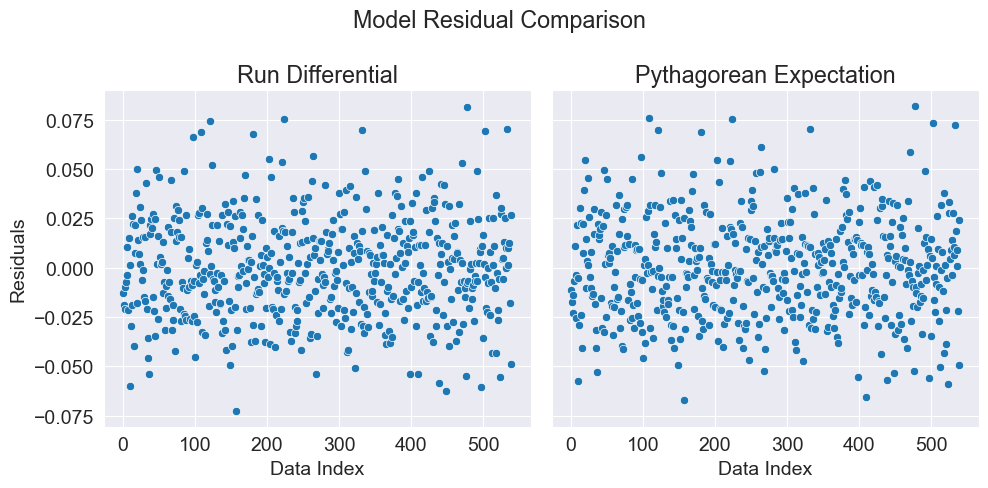

In [41]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5), sharey=True)
sns.scatterplot(x=resid_rd.index,y=resid_rd, ax=axs[0])
sns.scatterplot(x=resid_pe.index,y=resid_pe, ax=axs[1])

fig.suptitle('Model Residual Comparison')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Run Differential')
axs[1].set_title('Pythagorean Expectation')
axs[0].set_xlabel('Data Index')
axs[1].set_xlabel('Data Index')

fig.tight_layout()
fig.savefig('2e_resid_compare.png')